In [ ]:

from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from textblob import TextBlob

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/The Suicide Squad.csv')

In [ ]:
df

,username,tweet
0,RobertoCNievesArt,@DanielKalban @Michael26689428 Marvel beat DC ...
1,🏳️‍🌈Entertainment Talk🏳️‍🌈,#SuicideSquad vs #TheSuicideSquad And #DC Talk...
2,Dango•Girl,I saw The Suicide Squad for the second time th...
3,Josh Pascall,So far\n\nA QUIET PLACE PART II: not bad\nHITM...
4,Channing Ellison #FreePalestine,"@milajae_ The Shazam, Birds of Prey, and the N..."
...,...,...
6437,mica,suicide squad spoilers\nthis was especially co...
6438,mica,! the suicide squad 2021 spoilers !\n-\n-\n- \...
6439,Angelito the Yetibacca | #AnimationSupremacy,@LilFormers We are in the middle of a FUCKING ...
6440,Matthew Loftus🌊,"For the night crowd: This is not ""Finding God ..."


In [ ]:
df.head(20)

,username,tweet
0,RobertoCNievesArt,@DanielKalban @Michael26689428 Marvel beat DC ...
1,🏳️‍🌈Entertainment Talk🏳️‍🌈,#SuicideSquad vs #TheSuicideSquad And #DC Talk...
2,Dango•Girl,I saw The Suicide Squad for the second time th...
3,Josh Pascall,So far\n\nA QUIET PLACE PART II: not bad\nHITM...
4,Channing Ellison #FreePalestine,"@milajae_ The Shazam, Birds of Prey, and the N..."
5,Rohail 🇵🇰,Release the Ayer Cut!\n*insert image of 2016 S...
6,Mr. DumbShitBitch,I've never seen suicide squad or read the comi...
7,John Melmoth,The release of ZSJL improved the Flash cameo f...
8,Chad Flaherty,"@marcbernardin I really enjoyed Suicide Squad,..."
9,Empir3 A.D.,Not sure if anyone is interested in weapons fo...


In [ ]:
df.duplicated(subset='tweet').sum()

24

In [ ]:
df=df.drop_duplicates(subset=['tweet'])

In [ ]:
df

,username,tweet
0,RobertoCNievesArt,@DanielKalban @Michael26689428 Marvel beat DC ...
1,🏳️‍🌈Entertainment Talk🏳️‍🌈,#SuicideSquad vs #TheSuicideSquad And #DC Talk...
2,Dango•Girl,I saw The Suicide Squad for the second time th...
3,Josh Pascall,So far\n\nA QUIET PLACE PART II: not bad\nHITM...
4,Channing Ellison #FreePalestine,"@milajae_ The Shazam, Birds of Prey, and the N..."
...,...,...
6437,mica,suicide squad spoilers\nthis was especially co...
6438,mica,! the suicide squad 2021 spoilers !\n-\n-\n- \...
6439,Angelito the Yetibacca | #AnimationSupremacy,@LilFormers We are in the middle of a FUCKING ...
6440,Matthew Loftus🌊,"For the night crowd: This is not ""Finding God ..."


In [ ]:
def clean_text(text):
  text=text.lower() #letters casing convert all letter to lowercase
  text=re.sub(r"@[A-Za-z0-9_]+",'', text) #remove mentions
  text= re.sub(r'#','',text) #remove mentions
  text= re.sub(r'\n','',text)#remove \n
  text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE) # Remove urls

  return text

In [ ]:
df['tweet']=df['tweet'].apply(clean_text)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df

,username,tweet
0,RobertoCNievesArt,marvel beat dc films to the cinematic connec...
1,🏳️‍🌈Entertainment Talk🏳️‍🌈,suicidesquad vs thesuicidesquad and dc talk po...
2,Dango•Girl,i saw the suicide squad for the second time th...
3,Josh Pascall,so fara quiet place part ii: not badhitman's w...
4,Channing Ellison #FreePalestine,"the shazam, birds of prey, and the new suicid..."
...,...,...
6437,mica,suicide squad spoilersthis was especially cont...
6438,mica,! the suicide squad 2021 spoilers !--- it was ...
6439,Angelito the Yetibacca | #AnimationSupremacy,we are in the middle of a fucking pandemic. n...
6440,Matthew Loftus🌊,"for the night crowd: this is not ""finding god ..."


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

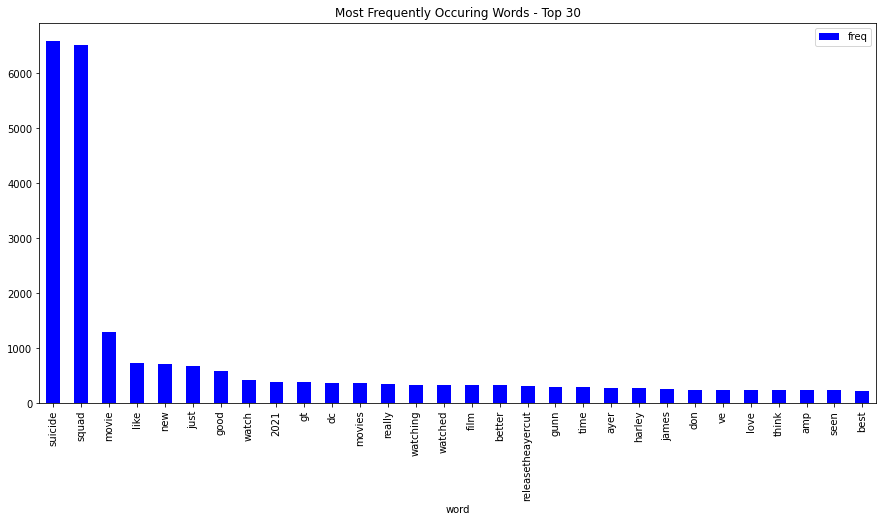

In [ ]:
cv = CountVectorizer(stop_words = 'english')
words=cv.fit_transform(df.tweet)
sum_words = words.sum(axis=0)
words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")


Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

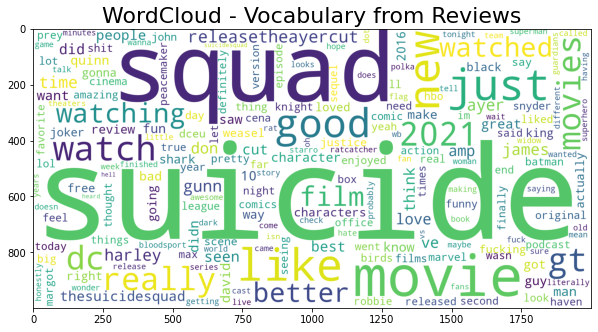

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 2000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

In [ ]:
def get_Subjectivity(text):
  return TextBlob(text).sentiment.subjectivity
def get_polarity(text):
  return TextBlob(text).sentiment.polarity

In [ ]:
df['Subjectivity']=df['tweet'].apply(get_Subjectivity)
df['polarity']=df['tweet'].apply(get_polarity)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df

,username,tweet,Subjectivity,polarity
0,RobertoCNievesArt,marvel beat dc films to the cinematic connec...,0.286667,4.000000e-02
1,🏳️‍🌈Entertainment Talk🏳️‍🌈,suicidesquad vs thesuicidesquad and dc talk po...,0.000000,0.000000e+00
2,Dango•Girl,i saw the suicide squad for the second time th...,0.425000,3.250000e-01
3,Josh Pascall,so fara quiet place part ii: not badhitman's w...,0.640000,2.400000e-01
4,Channing Ellison #FreePalestine,"the shazam, birds of prey, and the new suicid...",0.568182,4.121212e-01
...,...,...,...,...
6437,mica,suicide squad spoilersthis was especially cont...,0.555556,5.555556e-02
6438,mica,! the suicide squad 2021 spoilers !--- it was ...,0.387500,-6.250000e-02
6439,Angelito the Yetibacca | #AnimationSupremacy,we are in the middle of a fucking pandemic. n...,0.566667,3.700743e-17
6440,Matthew Loftus🌊,"for the night crowd: this is not ""finding god ...",0.000000,0.000000e+00


In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
import string
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
nltk.download('words')
words_en = set(nltk.corpus.words.words())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [ ]:

def tok(text):
  tok=[i for i in text if not (i.isdigit())] #for digit
  tok=''.join(tok)
  tok=[i for i in tok if i in (string.ascii_letters + ' ')] #for non english words
  tok=''.join(tok)
  tok=[i for i in tok if i not in string.punctuation] # for the punctuation
  tok=''.join(tok)
  tok=[word for word in tok.split() if word not in stopwords.words('english')] # for the stop words 
  final=[]
  for i in tok: # stemmer &lemmatizer
    i=wordnet_lemmatizer.lemmatize(i)
    i= porter_stemmer.stem(i)
    final.append(i)
  return final

In [ ]:
df['tk_tweet']=df['tweet'].apply(tok)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df

,username,tweet,Subjectivity,polarity,tk_tweet
0,RobertoCNievesArt,marvel beat dc films to the cinematic connec...,0.286667,4.000000e-02,"[marvel, beat, dc, film, cinemat, connect, fir..."
1,🏳️‍🌈Entertainment Talk🏳️‍🌈,suicidesquad vs thesuicidesquad and dc talk po...,0.000000,0.000000e+00,"[suicidesquad, v, thesuicidesquadand, dc, talk..."
2,Dango•Girl,i saw the suicide squad for the second time th...,0.425000,3.250000e-01,"[saw, suicid, squad, second, time, time, frien..."
3,Josh Pascall,so fara quiet place part ii: not badhitman's w...,0.640000,2.400000e-01,"[fara, quiet, place, part, ii, badhitman, wife..."
4,Channing Ellison #FreePalestine,"the shazam, birds of prey, and the new suicid...",0.568182,4.121212e-01,"[shazam, bird, prey, new, suicid, squad, movi,..."
...,...,...,...,...,...
6437,mica,suicide squad spoilersthis was especially cont...,0.555556,5.555556e-02,"[suicid, squad, spoilersthi, especi, contrast,..."
6438,mica,! the suicide squad 2021 spoilers !--- it was ...,0.387500,-6.250000e-02,"[suicid, squad, spoiler, cool, foreshadow, pea..."
6439,Angelito the Yetibacca | #AnimationSupremacy,we are in the middle of a fucking pandemic. n...,0.566667,3.700743e-17,"[middl, fuck, pandem, film, gettin, freequal, ..."
6440,Matthew Loftus🌊,"for the night crowd: this is not ""finding god ...",0.000000,0.000000e+00,"[night, crowd, find, god, suicid, squad, suppo..."


In [ ]:
def join(array):
  return ' '.join(array)


In [ ]:
df['pro_tweet']=df['tk_tweet'].apply(join)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df

,username,tweet,Subjectivity,polarity,tk_tweet,pro_tweet
0,RobertoCNievesArt,marvel beat dc films to the cinematic connec...,0.286667,4.000000e-02,"[marvel, beat, dc, film, cinemat, connect, fir...",marvel beat dc film cinemat connect first cant...
1,🏳️‍🌈Entertainment Talk🏳️‍🌈,suicidesquad vs thesuicidesquad and dc talk po...,0.000000,0.000000e+00,"[suicidesquad, v, thesuicidesquadand, dc, talk...",suicidesquad v thesuicidesquadand dc talk podc...
2,Dango•Girl,i saw the suicide squad for the second time th...,0.425000,3.250000e-01,"[saw, suicid, squad, second, time, time, frien...",saw suicid squad second time time friend love ...
3,Josh Pascall,so fara quiet place part ii: not badhitman's w...,0.640000,2.400000e-01,"[fara, quiet, place, part, ii, badhitman, wife...",fara quiet place part ii badhitman wife bodygu...
4,Channing Ellison #FreePalestine,"the shazam, birds of prey, and the new suicid...",0.568182,4.121212e-01,"[shazam, bird, prey, new, suicid, squad, movi,...",shazam bird prey new suicid squad movi great r...
...,...,...,...,...,...,...
6437,mica,suicide squad spoilersthis was especially cont...,0.555556,5.555556e-02,"[suicid, squad, spoilersthi, especi, contrast,...",suicid squad spoilersthi especi contrast squad...
6438,mica,! the suicide squad 2021 spoilers !--- it was ...,0.387500,-6.250000e-02,"[suicid, squad, spoiler, cool, foreshadow, pea...",suicid squad spoiler cool foreshadow peacemak ...
6439,Angelito the Yetibacca | #AnimationSupremacy,we are in the middle of a fucking pandemic. n...,0.566667,3.700743e-17,"[middl, fuck, pandem, film, gettin, freequal, ...",middl fuck pandem film gettin freequal noth su...
6440,Matthew Loftus🌊,"for the night crowd: this is not ""finding god ...",0.000000,0.000000e+00,"[night, crowd, find, god, suicid, squad, suppo...",night crowd find god suicid squad suppos that ...


Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

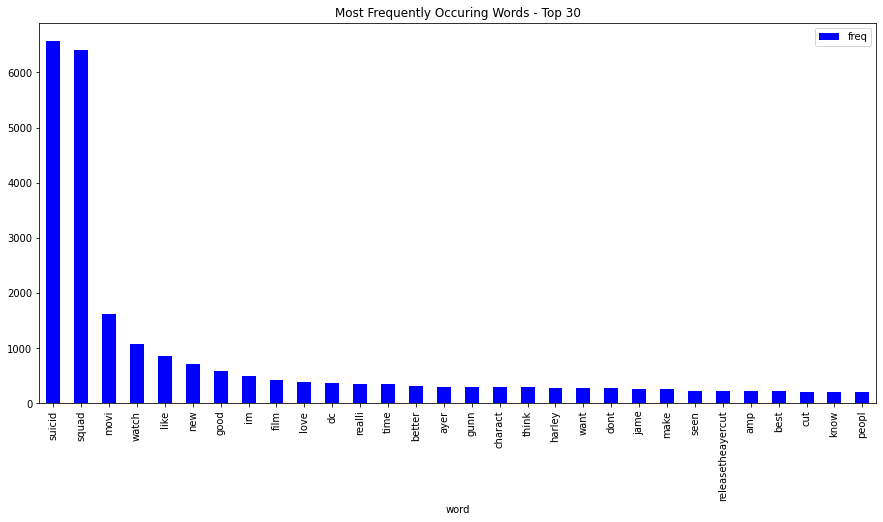

In [ ]:
cv = CountVectorizer(stop_words = 'english')
words=cv.fit_transform(df['pro_tweet'])
sum_words = words.sum(axis=0)
words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")


Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

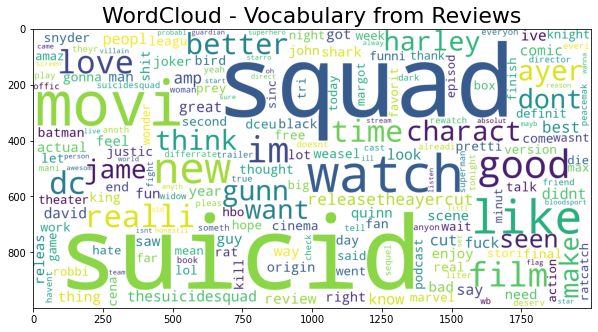

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 2000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

In [ ]:
df['pro_Subjectivity']=df['tweet'].apply(get_Subjectivity)
df['pro_polarity']=df['tweet'].apply(get_polarity)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df

,username,tweet,Subjectivity,polarity,tk_tweet,pro_tweet,pro_Subjectivity,pro_polarity
0,RobertoCNievesArt,marvel beat dc films to the cinematic connec...,0.286667,4.000000e-02,"[marvel, beat, dc, film, cinemat, connect, fir...",marvel beat dc film cinemat connect first cant...,0.286667,4.000000e-02
1,🏳️‍🌈Entertainment Talk🏳️‍🌈,suicidesquad vs thesuicidesquad and dc talk po...,0.000000,0.000000e+00,"[suicidesquad, v, thesuicidesquadand, dc, talk...",suicidesquad v thesuicidesquadand dc talk podc...,0.000000,0.000000e+00
2,Dango•Girl,i saw the suicide squad for the second time th...,0.425000,3.250000e-01,"[saw, suicid, squad, second, time, time, frien...",saw suicid squad second time time friend love ...,0.425000,3.250000e-01
3,Josh Pascall,so fara quiet place part ii: not badhitman's w...,0.640000,2.400000e-01,"[fara, quiet, place, part, ii, badhitman, wife...",fara quiet place part ii badhitman wife bodygu...,0.640000,2.400000e-01
4,Channing Ellison #FreePalestine,"the shazam, birds of prey, and the new suicid...",0.568182,4.121212e-01,"[shazam, bird, prey, new, suicid, squad, movi,...",shazam bird prey new suicid squad movi great r...,0.568182,4.121212e-01
...,...,...,...,...,...,...,...,...
6437,mica,suicide squad spoilersthis was especially cont...,0.555556,5.555556e-02,"[suicid, squad, spoilersthi, especi, contrast,...",suicid squad spoilersthi especi contrast squad...,0.555556,5.555556e-02
6438,mica,! the suicide squad 2021 spoilers !--- it was ...,0.387500,-6.250000e-02,"[suicid, squad, spoiler, cool, foreshadow, pea...",suicid squad spoiler cool foreshadow peacemak ...,0.387500,-6.250000e-02
6439,Angelito the Yetibacca | #AnimationSupremacy,we are in the middle of a fucking pandemic. n...,0.566667,3.700743e-17,"[middl, fuck, pandem, film, gettin, freequal, ...",middl fuck pandem film gettin freequal noth su...,0.566667,3.700743e-17
6440,Matthew Loftus🌊,"for the night crowd: this is not ""finding god ...",0.000000,0.000000e+00,"[night, crowd, find, god, suicid, squad, suppo...",night crowd find god suicid squad suppos that ...,0.000000,0.000000e+00


In [ ]:
from sklearn.metrics import mean_absolute_error
print('pro','normal',' ploarty',mean_absolute_error(df['pro_polarity'],df['polarity']))
print('pro','normal',' Subjectivity',mean_absolute_error(df['pro_Subjectivity'],df['Subjectivity']))

pro normal  ploarty 0.0
pro normal  Subjectivity 0.0


there is no deference

In [ ]:
df.drop(['pro_Subjectivity', 'pro_polarity'], axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df

,username,tweet,Subjectivity,polarity,tk_tweet,pro_tweet
0,RobertoCNievesArt,marvel beat dc films to the cinematic connec...,0.286667,4.000000e-02,"[marvel, beat, dc, film, cinemat, connect, fir...",marvel beat dc film cinemat connect first cant...
1,🏳️‍🌈Entertainment Talk🏳️‍🌈,suicidesquad vs thesuicidesquad and dc talk po...,0.000000,0.000000e+00,"[suicidesquad, v, thesuicidesquadand, dc, talk...",suicidesquad v thesuicidesquadand dc talk podc...
2,Dango•Girl,i saw the suicide squad for the second time th...,0.425000,3.250000e-01,"[saw, suicid, squad, second, time, time, frien...",saw suicid squad second time time friend love ...
3,Josh Pascall,so fara quiet place part ii: not badhitman's w...,0.640000,2.400000e-01,"[fara, quiet, place, part, ii, badhitman, wife...",fara quiet place part ii badhitman wife bodygu...
4,Channing Ellison #FreePalestine,"the shazam, birds of prey, and the new suicid...",0.568182,4.121212e-01,"[shazam, bird, prey, new, suicid, squad, movi,...",shazam bird prey new suicid squad movi great r...
...,...,...,...,...,...,...
6437,mica,suicide squad spoilersthis was especially cont...,0.555556,5.555556e-02,"[suicid, squad, spoilersthi, especi, contrast,...",suicid squad spoilersthi especi contrast squad...
6438,mica,! the suicide squad 2021 spoilers !--- it was ...,0.387500,-6.250000e-02,"[suicid, squad, spoiler, cool, foreshadow, pea...",suicid squad spoiler cool foreshadow peacemak ...
6439,Angelito the Yetibacca | #AnimationSupremacy,we are in the middle of a fucking pandemic. n...,0.566667,3.700743e-17,"[middl, fuck, pandem, film, gettin, freequal, ...",middl fuck pandem film gettin freequal noth su...
6440,Matthew Loftus🌊,"for the night crowd: this is not ""finding god ...",0.000000,0.000000e+00,"[night, crowd, find, god, suicid, squad, suppo...",night crowd find god suicid squad suppos that ...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
CountVec = CountVectorizer(ngram_range=(1,1),
                           stop_words='english',max_features=500)
#transform
Count_data = CountVec.fit_transform(df['pro_tweet'])

cv_dataframe=pd.DataFrame(Count_data.toarray(),columns=CountVec.get_feature_names())

In [ ]:
cv_dataframe

,abl,absolut,act,action,actor,actual,ad,ago,agre,aint,alreadi,alway,amaz,amp,anim,anoth,anyon,anyth,appear,aquaman,arkham,art,ask,audienc,aveng,away,awesom,ayer,bad,base,basic,batman,bc,beach,begin,believ,best,better,big,bird,...,video,view,villain,viola,vision,wait,waller,wanna,want,war,wasnt,watch,way,wb,weasel,week,weekend,weird,went,widow,win,wish,woman,wonder,wont,word,work,world,wors,worst,worth,wouldnt,wow,wrong,yall,ye,yeah,year,youtub,zack
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6413,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6414,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6415,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6416,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
tf_idf_vec= TfidfVectorizer(use_idf=True, 
                        smooth_idf=False,  
                        ngram_range=(1,1),stop_words='english',max_features=500) 
#transform
tf_idf_data = tf_idf_vec.fit_transform(df['pro_tweet'])
 
#create dataframe
tf_idf_dataframe=pd.DataFrame(tf_idf_data.toarray(),columns=tf_idf_vec.get_feature_names())
tf_idf_dataframe

,abl,absolut,act,action,actor,actual,ad,ago,agre,aint,alreadi,alway,amaz,amp,anim,anoth,anyon,anyth,appear,aquaman,arkham,art,ask,audienc,aveng,away,awesom,ayer,bad,base,basic,batman,bc,beach,begin,believ,best,better,big,bird,...,video,view,villain,viola,vision,wait,waller,wanna,want,war,wasnt,watch,way,wb,weasel,week,weekend,weird,went,widow,win,wish,woman,wonder,wont,word,work,world,wors,worst,worth,wouldnt,wow,wrong,yall,ye,yeah,year,youtub,zack
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.300687,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.293055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.343584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.353676,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.196317,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6413,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.486182,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6414,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6415,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.443280,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
tf_idf_vec_smooth = TfidfVectorizer(use_idf=True,  
                        smooth_idf=True,  
                        ngram_range=(1,1),stop_words='english',max_features=250)
 
 
tf_idf_data_smooth = tf_idf_vec_smooth.fit_transform(df['pro_tweet'])
 

tf_idf_dataframe_smooth=pd.DataFrame(tf_idf_data_smooth.toarray(),columns=tf_idf_vec_smooth.get_feature_names())
tf_idf_dataframe_smooth

,absolut,act,action,actual,alreadi,alway,amaz,amp,anoth,anyon,anyth,awesom,ayer,bad,batman,best,better,big,bird,black,bloodsport,book,box,came,care,cast,caus,cena,charact,check,cinema,come,comic,complet,cool,cut,damn,dark,david,davidson,...,superman,sure,talk,team,tell,thank,theater,thesuicidesquad,theyr,thing,think,thought,time,today,tonight,trailer,tri,true,univers,version,video,villain,wait,wanna,want,wasnt,watch,way,wb,weasel,week,weekend,went,widow,woman,wonder,work,world,yeah,year
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.355849,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.451136,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.300528,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.447006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.318221,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.372587,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.39838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.221485,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6413,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.642566,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.695396,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
6414,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.504578,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
6415,0.0,0.0,0.0,0.0,0.0,0.0,0.529085,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
6416,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00

In [ ]:
def getSentimentTextBlob(polarity):
    if polarity < 0:
        return "Negative"
    elif polarity == 0:
        return "Neutral"
    else:
        return "Positive"

In [ ]:
df['Sentiment']=df['polarity'].apply(getSentimentTextBlob)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df['Sentiment'].value_counts()

Positive    3375
Neutral     1965
Negative    1078
Name: Sentiment, dtype: int64

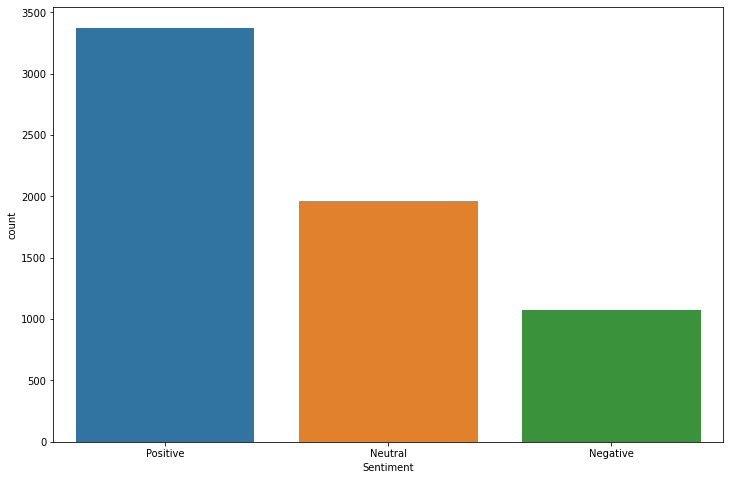

In [ ]:
fig,ax=plt.subplots(figsize=(12,8))
sns.countplot(data=df,x='Sentiment',ax=ax)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans= KMeans(n_clusters=2, n_init=100, init='k-means++', algorithm='full', max_iter=300)
kmeans.fit(tf_idf_dataframe_smooth)
labels= kmeans.labels_
labels

array([0, 0, 0, ..., 0, 0, 1], dtype=int32)

In [ ]:
(labels==0).sum()

5770

In [ ]:
(labels==1).sum()

648

In [ ]:
kmeans= KMeans(n_clusters=2, n_init=100 ,init= 'k-means++', algorithm='full', max_iter=300)
kmeans.fit(cv_dataframe)
labels2= kmeans.labels_
labels2

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
(labels2==0).sum()

5027

In [ ]:
(labels2==1).sum()#6418

1391

In [ ]:
kmeans= KMeans(n_clusters=3, n_init=100 ,init= 'k-means++', algorithm='full', max_iter=300)
kmeans.fit(cv_dataframe)
labels3= kmeans.labels_
labels3

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
(labels3==0).sum()

4341

In [ ]:
(labels3==1).sum()

1139

In [ ]:
(labels3==2).sum()

938

In [ ]:
df['labels']=labels2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df

,username,tweet,Subjectivity,polarity,tk_tweet,pro_tweet,Sentiment,labels
0,RobertoCNievesArt,marvel beat dc films to the cinematic connec...,0.286667,4.000000e-02,"[marvel, beat, dc, film, cinemat, connect, fir...",marvel beat dc film cinemat connect first cant...,Positive,0
1,🏳️‍🌈Entertainment Talk🏳️‍🌈,suicidesquad vs thesuicidesquad and dc talk po...,0.000000,0.000000e+00,"[suicidesquad, v, thesuicidesquadand, dc, talk...",suicidesquad v thesuicidesquadand dc talk podc...,Neutral,0
2,Dango•Girl,i saw the suicide squad for the second time th...,0.425000,3.250000e-01,"[saw, suicid, squad, second, time, time, frien...",saw suicid squad second time time friend love ...,Positive,0
3,Josh Pascall,so fara quiet place part ii: not badhitman's w...,0.640000,2.400000e-01,"[fara, quiet, place, part, ii, badhitman, wife...",fara quiet place part ii badhitman wife bodygu...,Positive,0
4,Channing Ellison #FreePalestine,"the shazam, birds of prey, and the new suicid...",0.568182,4.121212e-01,"[shazam, bird, prey, new, suicid, squad, movi,...",shazam bird prey new suicid squad movi great r...,Positive,1
...,...,...,...,...,...,...,...,...
6437,mica,suicide squad spoilersthis was especially cont...,0.555556,5.555556e-02,"[suicid, squad, spoilersthi, especi, contrast,...",suicid squad spoilersthi especi contrast squad...,Positive,0
6438,mica,! the suicide squad 2021 spoilers !--- it was ...,0.387500,-6.250000e-02,"[suicid, squad, spoiler, cool, foreshadow, pea...",suicid squad spoiler cool foreshadow peacemak ...,Negative,0
6439,Angelito the Yetibacca | #AnimationSupremacy,we are in the middle of a fucking pandemic. n...,0.566667,3.700743e-17,"[middl, fuck, pandem, film, gettin, freequal, ...",middl fuck pandem film gettin freequal noth su...,Positive,0
6440,Matthew Loftus🌊,"for the night crowd: this is not ""finding god ...",0.000000,0.000000e+00,"[night, crowd, find, god, suicid, squad, suppo...",night crowd find god suicid squad suppos that ...,Neutral,0


In [ ]:
df['labels'].value_counts()

0    5027
1    1391
Name: labels, dtype: int64

In [ ]:
5027/(5027+1391) #7.4 in imdb

0.7832658148956061

In [ ]:
def label_to_res(x):
  if x==1:
    return "Positive"
  else:
    return "Negative"

In [ ]:
df['labels_wr']=df['labels'].apply(label_to_res)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


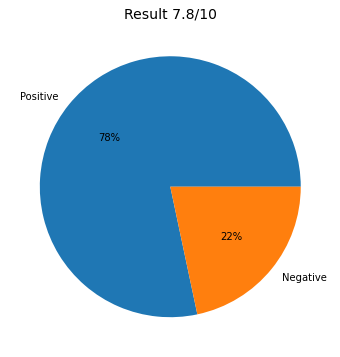

In [ ]:
pie, ax = plt.subplots(figsize=[10,6])
y=df['labels'].value_counts()
plt.pie(y,labels =['Positive','Negative'],autopct='%.0f%%')
plt.title("Result 7.8/10", fontsize=14)
plt.show()


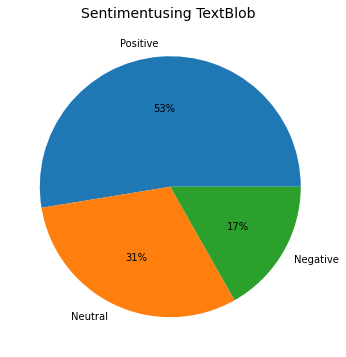

In [ ]:
pie, ax = plt.subplots(figsize=[10,6])
y=df['Sentiment'].value_counts()
plt.pie(y,labels =['Positive','Neutral','Negative'],autopct='%.0f%%')
plt.title("Sentimentusing TextBlob ", fontsize=14)
plt.show()


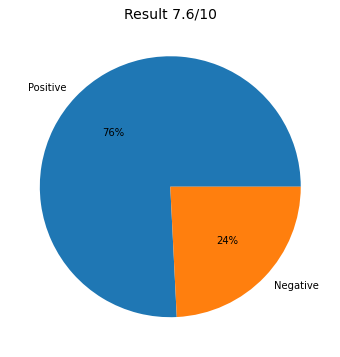

In [ ]:
pie, ax = plt.subplots(figsize=[10,6])
y=df['Sentiment'].value_counts()[['Positive','Negative']]
plt.pie(y,labels =['Positive','Negative'],autopct='%.0f%%')
plt.title("Result 7.6/10", fontsize=14)
plt.show()


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tf_idf_dataframe, 
                                                   df['labels'], test_size=0.20 
                                                    ,random_state=42)

In [ ]:
svc=SVC(random_state=42)

In [ ]:
svc.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
predictions = svc.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       993
           1       1.00      1.00      1.00       291

    accuracy                           1.00      1284
   macro avg       1.00      1.00      1.00      1284
weighted avg       1.00      1.00      1.00      1284



In [ ]:
confusion_matrix(y_test,predictions)

array([[993,   0],
       [  0, 291]])

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.63      0.77       993
           1       0.44      0.99      0.61       291

    accuracy                           0.71      1284
   macro avg       0.72      0.81      0.69      1284
weighted avg       0.87      0.71      0.73      1284



In [ ]:
confusion_matrix(y_test,y_pred)

array([[623, 370],
       [  4, 287]])

In [ ]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(svc, X_train, y_train, cv=3)

In [ ]:
confusion_matrix(y_train, y_train_pred)

array([[4034,    0],
       [   1, 1099]])

In [ ]:
cru= pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Cruella.csv')

In [ ]:
cru['tweet']=cru['tweet'].apply(clean_text)
cru['tk_tweet']=cru['tweet'].apply(tok)
cru['pro_tweet']=cru['tk_tweet'].apply(join)

In [ ]:
tf_idf_data = tf_idf_vec.fit_transform(cru['pro_tweet'])
 
cru_vic=pd.DataFrame(tf_idf_data.toarray(),columns=tf_idf_vec.get_feature_names())
cru_vic

,absolut,access,account,act,action,actress,actual,add,ago,alreadi,alway,amaz,amp,anim,anita,announc,anoth,anygabriellycriadora,anyon,anyth,art,artist,artistofthesumm,ask,august,avail,aventura,award,away,awesom,bad,baro,bc,beauti,becom,believ,best,better,big,biggest,...,unit,use,version,vibe,video,vil,vill,villain,vote,wait,wake,walt,wanna,want,wasnt,watch,way,wear,week,weekend,weird,welcom,went,white,widow,win,wish,woman,wonder,wont,work,world,worth,wow,wrong,yall,ye,yeah,year,young
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.539038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.665778,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.435304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.366216,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.370883,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
6626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
6627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
6628,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
cru['labels'] = svc.predict(cru_vic)

In [ ]:
cru['labels'].value_counts()

0    6595
1      35
Name: labels, dtype: int64

In [ ]:
cru

,username,tweet,tk_tweet,pro_tweet,labels
0,esme 🍂,finally watching cruella !!!,"[final, watch, cruella]",final watch cruella,0
1,Jenny Jain~ 💯% FB,🙏✅👍❤️💯❤️👍✅🙏thanks buddy f...,"[thank, buddi, promot, mention, id]",thank buddi promot mention id,0
2,Neal McAlister,wow you must be evil as cruella deville,"[wow, must, evil, cruella, devil]",wow must evil cruella devil,0
3,VamosLouislp²⁸🖕🏻,cruellai vote louis tomlinson () for artistof...,"[cruellai, vote, loui, tomlinson, artistofthes...",cruellai vote loui tomlinson artistofthesumm,0
4,Exhibitor Relations Co.,i mean. i still hope disney is going to repor...,"[mean, still, hope, disney, go, report, total,...",mean still hope disney go report total cruella...,0
...,...,...,...,...,...
6625,Alan Charbonneau,when was the last time you were hungry?you ar...,"[last, time, hungryy, vile, even, imagin, audi...",last time hungryy vile even imagin audit seque...,0
6626,LdMistery,the fact the satanist movie cruella gets a seq...,"[fact, satanist, movi, cruella, get, sequel, t...",fact satanist movi cruella get sequel tell eno...,0
6627,fuck Audrey she better Hope I don’t find her addy,cruella 2 is happening and i haven’t even seen...,"[cruella, happen, havent, even, seen, cruella]",cruella happen havent even seen cruella,0
6628,kyle,cruella is itzy’s target audience,"[cruella, itzi, target, audienc]",cruella itzi target audienc,0


In [ ]:
Count_data = CountVec.fit_transform(cru['pro_tweet'])

cru_count=pd.DataFrame(Count_data.toarray(),columns=CountVec.get_feature_names())

In [ ]:
kmeans= KMeans(n_clusters=2, n_init=100, init='k-means++', algorithm='full', max_iter=300)
kmeans.fit(cru_count)
labels_cru= kmeans.labels_
labels_cru

array([0, 0, 0, ..., 0, 0, 1], dtype=int32)

In [ ]:
(labels_cru==0).sum()

5829

In [ ]:
(labels_cru==1).sum()

801